In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
returns = pd.read_csv('data_stock_returns.csv')

In [3]:
returns.head()

,Date,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,...,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
0,2019-01-02,0.009829,0.010542,0.009354,0.018961,-0.006221,0.043115,0.031979,0.035795,0.018333,...,-0.023222,-0.011107,-0.038352,-0.023718,-0.027728,-0.007796,-0.004564,-0.013306,-0.024556,-0.021542
1,2019-01-03,-0.036155,-0.001703,0.007825,0.004524,-0.024525,-0.005824,0.002515,0.020651,-0.020871,...,-0.002476,0.001196,-0.009491,-0.000197,0.010085,-0.003564,0.014082,0.004579,0.002660,-0.003948
2,2019-01-04,0.039127,0.051651,0.033218,0.027974,0.030381,0.017754,0.019072,0.068034,0.070034,...,0.018249,0.017378,0.033601,0.010764,0.012229,0.030242,0.008310,0.029491,0.007352,0.009738
3,2019-01-07,0.027806,-0.004204,-0.010668,0.021706,0.008630,0.014810,0.014271,0.011252,0.036862,...,-0.001450,0.005467,0.009179,0.002139,-0.001890,0.001384,-0.002239,-0.000181,-0.004552,-0.004339
4,2019-01-08,0.029859,-0.002524,0.008152,0.025441,0.007748,0.026410,0.020041,0.002793,0.016194,...,0.007287,0.018519,0.015114,0.003878,0.014904,0.013059,0.028071,0.027595,0.010249,0.011530


In [4]:
returns.tail()

,Date,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,...,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
247,2019-12-24,-0.001359,0.000291,0.009703,-0.002277,0.004207,0.003943,0.007496,0.001956,0.007026,...,0.007219,-0.000729,-0.004752,-0.001537,-0.001350,-0.001122,-0.002057,0.000598,0.001529,0.003905
248,2019-12-26,0.001359,0.010077,0.009833,-0.003807,0.002818,0.007540,0.004212,0.008617,-0.000369,...,0.006011,-0.002921,-0.016684,0.002049,0.001012,-0.002530,0.000633,0.006418,0.001418,-0.001114
249,2019-12-27,0.005081,-0.004209,0.002887,0.023371,0.000343,-0.004517,-0.005511,-0.004994,-0.000738,...,0.002271,-0.002196,0.000000,-0.000853,-0.001125,-0.000281,0.004580,0.001446,0.006085,0.005242
250,2019-12-30,-0.005251,-0.001262,0.001772,-0.024134,-0.013678,-0.011231,-0.008161,-0.015700,-0.013930,...,-0.005043,0.008393,0.000000,0.001535,0.004492,0.004214,-0.001893,0.001192,-0.001518,0.002690
251,2019-12-31,0.009129,0.004132,-0.004659,0.008362,0.005964,-0.000611,-0.000656,0.002258,0.005409,...,0.003599,0.011561,0.013168,0.006456,0.007590,0.005870,0.005667,0.002843,0.000651,0.003155


In [5]:
returns.shape

(252, 489)

**ANSWER FOR QUESTION 5**: 488

In [6]:
returns.Date.value_counts()

2019-12-04    1
2019-08-02    1
2019-10-14    1
2019-02-28    1
2019-10-17    1
             ..
2019-08-14    1
2019-06-03    1
2019-05-03    1
2019-12-02    1
2019-08-13    1
Name: Date, Length: 252, dtype: int64

In [7]:
amzn_returns = pd.Series(returns['AMZN'])

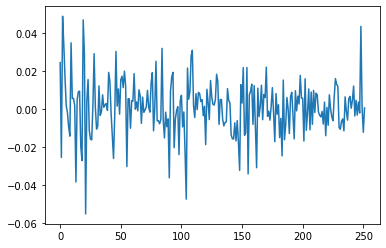

In [8]:
plt.plot(amzn_returns)

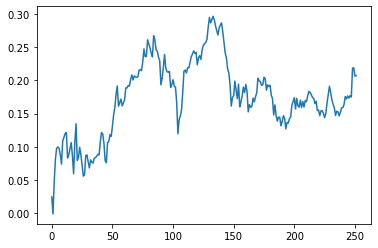

In [9]:
plt.plot(amzn_returns.cumsum())

In [10]:
import statsmodels.api as sm

The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [11]:
def lin_reg(x, y):
    '''
    oridinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

In [12]:
aapl = np.array(returns["AAPL"])
intc = np.array(returns["INTC"])
msft = np.array(returns["MSFT"])
ibm = np.array(returns["IBM"])
coefficients, residuals, r_squared = lin_reg(intc, aapl)
b0 = coefficients[0]
b1 = coefficients[1]
y = b0+b1*intc

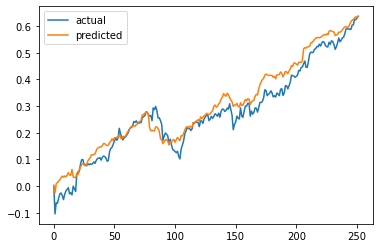

In [13]:
plt.plot(aapl.cumsum())
plt.plot(y.cumsum())
plt.legend(['actual', 'predicted'])

The Intel stocks describe the Apple stock returns very well. 

In [14]:
matrix = returns[["INTC","MSFT","IBM"]].values
coefficients, residuals, r_squared = lin_reg(matrix, aapl)
b0 = coefficients[0]
b1 = coefficients[1]
b2 = coefficients[2]
b3 = coefficients[3]
y = b0+b1*intc+b2*msft+b3*ibm

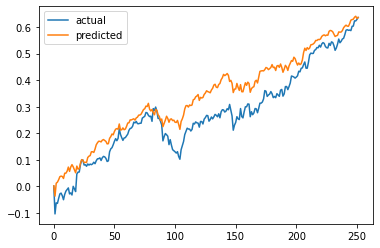

In [15]:
plt.plot(aapl.cumsum())
plt.plot(y.cumsum())
plt.legend(['actual', 'predicted'])

Together, the Intel, Microsoft, and IBM stocks describe the Apple stock returns with less accuracy than the Intel stocks alone. 

In [16]:
spy_prices = pd.read_csv('SPY.csv', index_col = 0)

In [17]:
spy_prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


In [18]:
high = spy_prices["High"]
max_price = high.max()
print(max_price)

339.0799865722656


In [19]:
low = spy_prices["Low"]
min_price = high.min()
print(min_price)

184.1000061035156


In [20]:
spy_prices.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,302.190002,295.459991,301.929993,299.079987,88951400.0,297.769623
2020-05-27,303.570007,296.869995,302.119995,303.529999,104817400.0,302.200134
2020-05-28,306.839996,302.239990,304.649994,302.970001,90405200.0,301.642609
2020-05-29,304.959991,299.470001,302.459991,304.320007,119265700.0,302.986694
2020-06-01,306.209991,303.059998,303.619995,305.549988,55758300.0,304.211273


**ANSWER FOR QUESTION 15**: Prices: Min: 184.10 Max: 339.08, Dates: 01/02/2015 - 06/01/2020

In [21]:
spy_adjclose = pd.Series(spy_prices['Adj Close'])

In [22]:
spy_returns = spy_adjclose.pct_change().loc['2019-01-01':'2020-01-01']
print(spy_returns)

Date
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 252, dtype: float64


In [23]:
returns = returns.drop("Date",1)

In [24]:
returns = returns.astype(float)

In [25]:
U, Sigma, V = la.svd(returns)

In [26]:
u_sigma1 = U.T[0]

In [27]:
coefficients, residuals, r_squared = lin_reg(u_sigma1, spy_returns.values)
b0 = coefficients[0]
b1 = coefficients[1]
y = b0+b1*u_sigma1
r_squared

0.8987899218671402

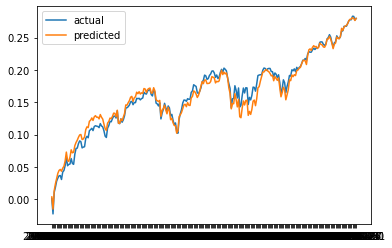

In [28]:
plt.plot(spy_returns.cumsum())
plt.plot(y.cumsum())
plt.legend(['actual', 'predicted'])

The cumulative sum of the U-sigma values predict the actual market extremely well. 